In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,            # base font size
    "axes.labelsize": 14,       # x/y labels
    "axes.titlesize": 14,       # title
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "figure.dpi": 300
})


In [3]:
def normalize_the_data(flare_data):
    flare_data = np.array(flare_data)
    n_elements = flare_data.shape[0]
    for j in range(flare_data.shape[1]):
        standard_deviation_of_this_feature = np.std(flare_data[:, j])
        median_of_this_feature = np.median(flare_data[:, j])
        for i in range(n_elements):
            flare_data[i, j] = (
                flare_data[i, j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return flare_data

# Incorrect Normalisation

  Here I am first normalizing the positive and the negative data and then combining it.

In [4]:
positive = pd.read_csv("Data 2016/positive24.csv")
negative = pd.read_csv("Data 2016/negative24.csv")

In [5]:
positive = positive.drop(["Unnamed: 0","HARPNUM","NOAA","Class","Peak Time"],axis =1)
negative = negative.drop(["Unnamed: 0","HARPNUM","NOAA","Class","Peak Time"],axis =1)

In [6]:
positive = normalize_the_data(positive)
negative = normalize_the_data(negative)

In [7]:
data = pd.concat([pd.DataFrame(positive),pd.DataFrame(negative)],axis =0,ignore_index=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.683536,1.228825,1.187605,1.341540,1.538371,-0.031713,1.964964,1.039079,1.588854,1.412458,0.479063,-0.138641,-0.609339,-0.158695,1.478564,-0.465596,0.168731,0.143965
1,-0.687282,0.163756,-0.307568,0.233416,0.729136,-0.696221,0.126933,-0.320444,0.483938,-0.048298,0.634529,-0.587053,-0.975322,-0.440760,0.548052,-0.452368,-0.546061,-0.995568
2,0.671721,-0.038156,0.291210,-0.006897,-0.415013,0.590902,-0.482673,0.248166,-0.704398,0.018875,-0.960586,0.551558,0.353747,0.282647,-0.485157,0.342701,0.254164,-0.073763
3,-0.633931,1.380068,0.422894,-1.496324,-1.590158,-0.761450,-0.651285,0.724150,-1.555935,0.885621,-0.132753,-0.642446,-0.284639,-0.784303,-1.483319,-0.444973,-1.018792,-0.487360
4,-0.775043,1.394271,1.890425,0.508957,0.722483,-0.244243,1.594499,2.191669,0.806897,1.276367,1.803558,-0.333000,0.803737,-0.376272,0.609180,-0.209178,0.128862,0.704236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.493557,-1.173284,0.227735,-1.451566,-1.828383,-0.074589,-1.631898,0.284332,-1.851304,-1.368526,-0.449210,-0.011559,-0.653985,-0.220898,-1.978293,0.043850,-0.412186,-0.440268
418,0.333926,-1.037965,-0.566779,1.704336,1.372933,0.231902,0.048745,-0.369015,1.040936,-0.760979,-1.029467,0.188365,0.474095,0.721140,1.199423,0.188851,0.395517,0.523659
419,0.329740,-1.388186,-0.636757,1.501701,1.813611,0.256387,-0.099770,-0.522108,1.452617,-1.308606,-0.346825,0.324894,0.888517,0.818817,1.628232,0.187039,0.313686,0.808394
420,0.169597,0.727111,0.539591,-1.144203,-1.352942,-0.024701,-0.337428,0.654187,-1.247506,0.707554,-0.412952,0.027526,0.358556,-0.225982,-1.268822,0.107694,-0.306109,0.007054


In [8]:
from sklearn import svm
number_of_examples = data.shape[0]
C = 4.0
gamma = 0.075
class_weight = "balanced"
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', class_weight=class_weight,cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True)

In [9]:
xdata = np.array(data)
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

In [10]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18

selector = SelectKBest(f_classif, k=N_features)
selector.fit(xdata,ydata)
scores = selector.scores_
print(scores)

[0.4966607  1.92015445 2.19555282 1.26375879 0.74238608 0.00566316
 1.1899437  1.77130833 0.43481414 0.11609058 0.36633671 0.05059804
 1.76062116 0.82222595 0.6151188  0.11331903 0.15856793 0.81030306]


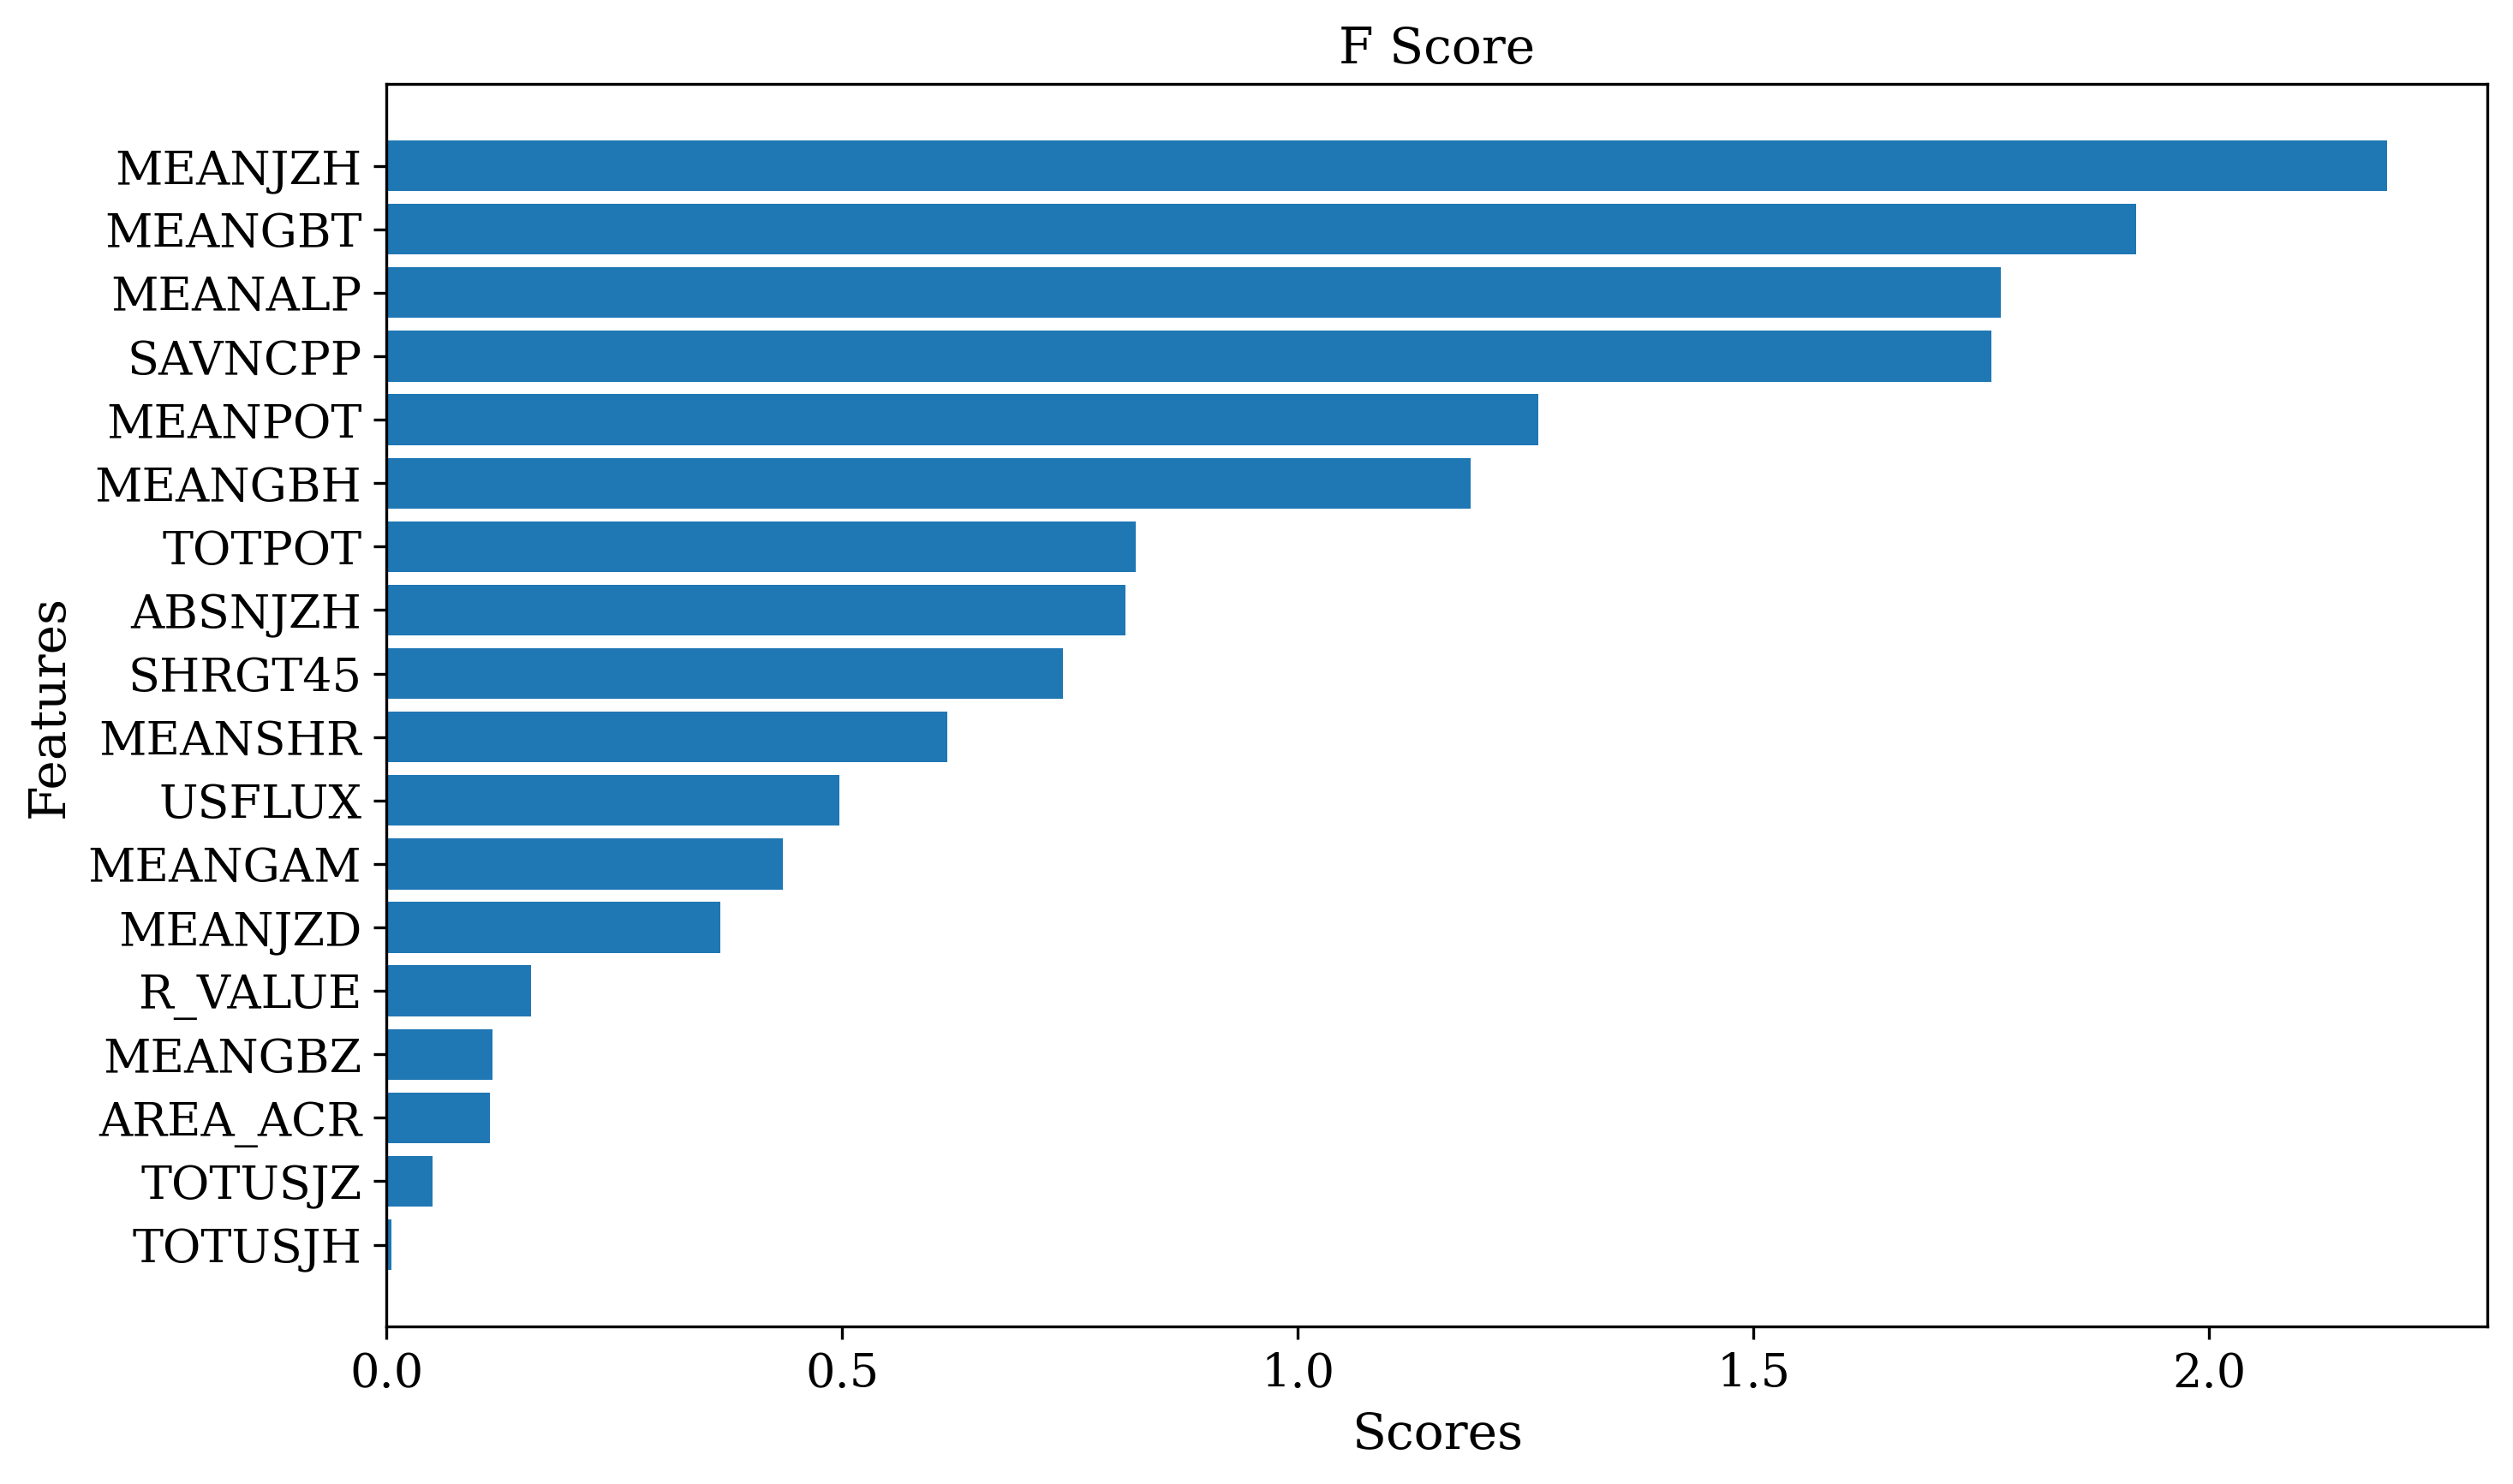

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH','MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH']
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [12]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [13]:
from sklearn.model_selection import StratifiedKFold

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(2, 52):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

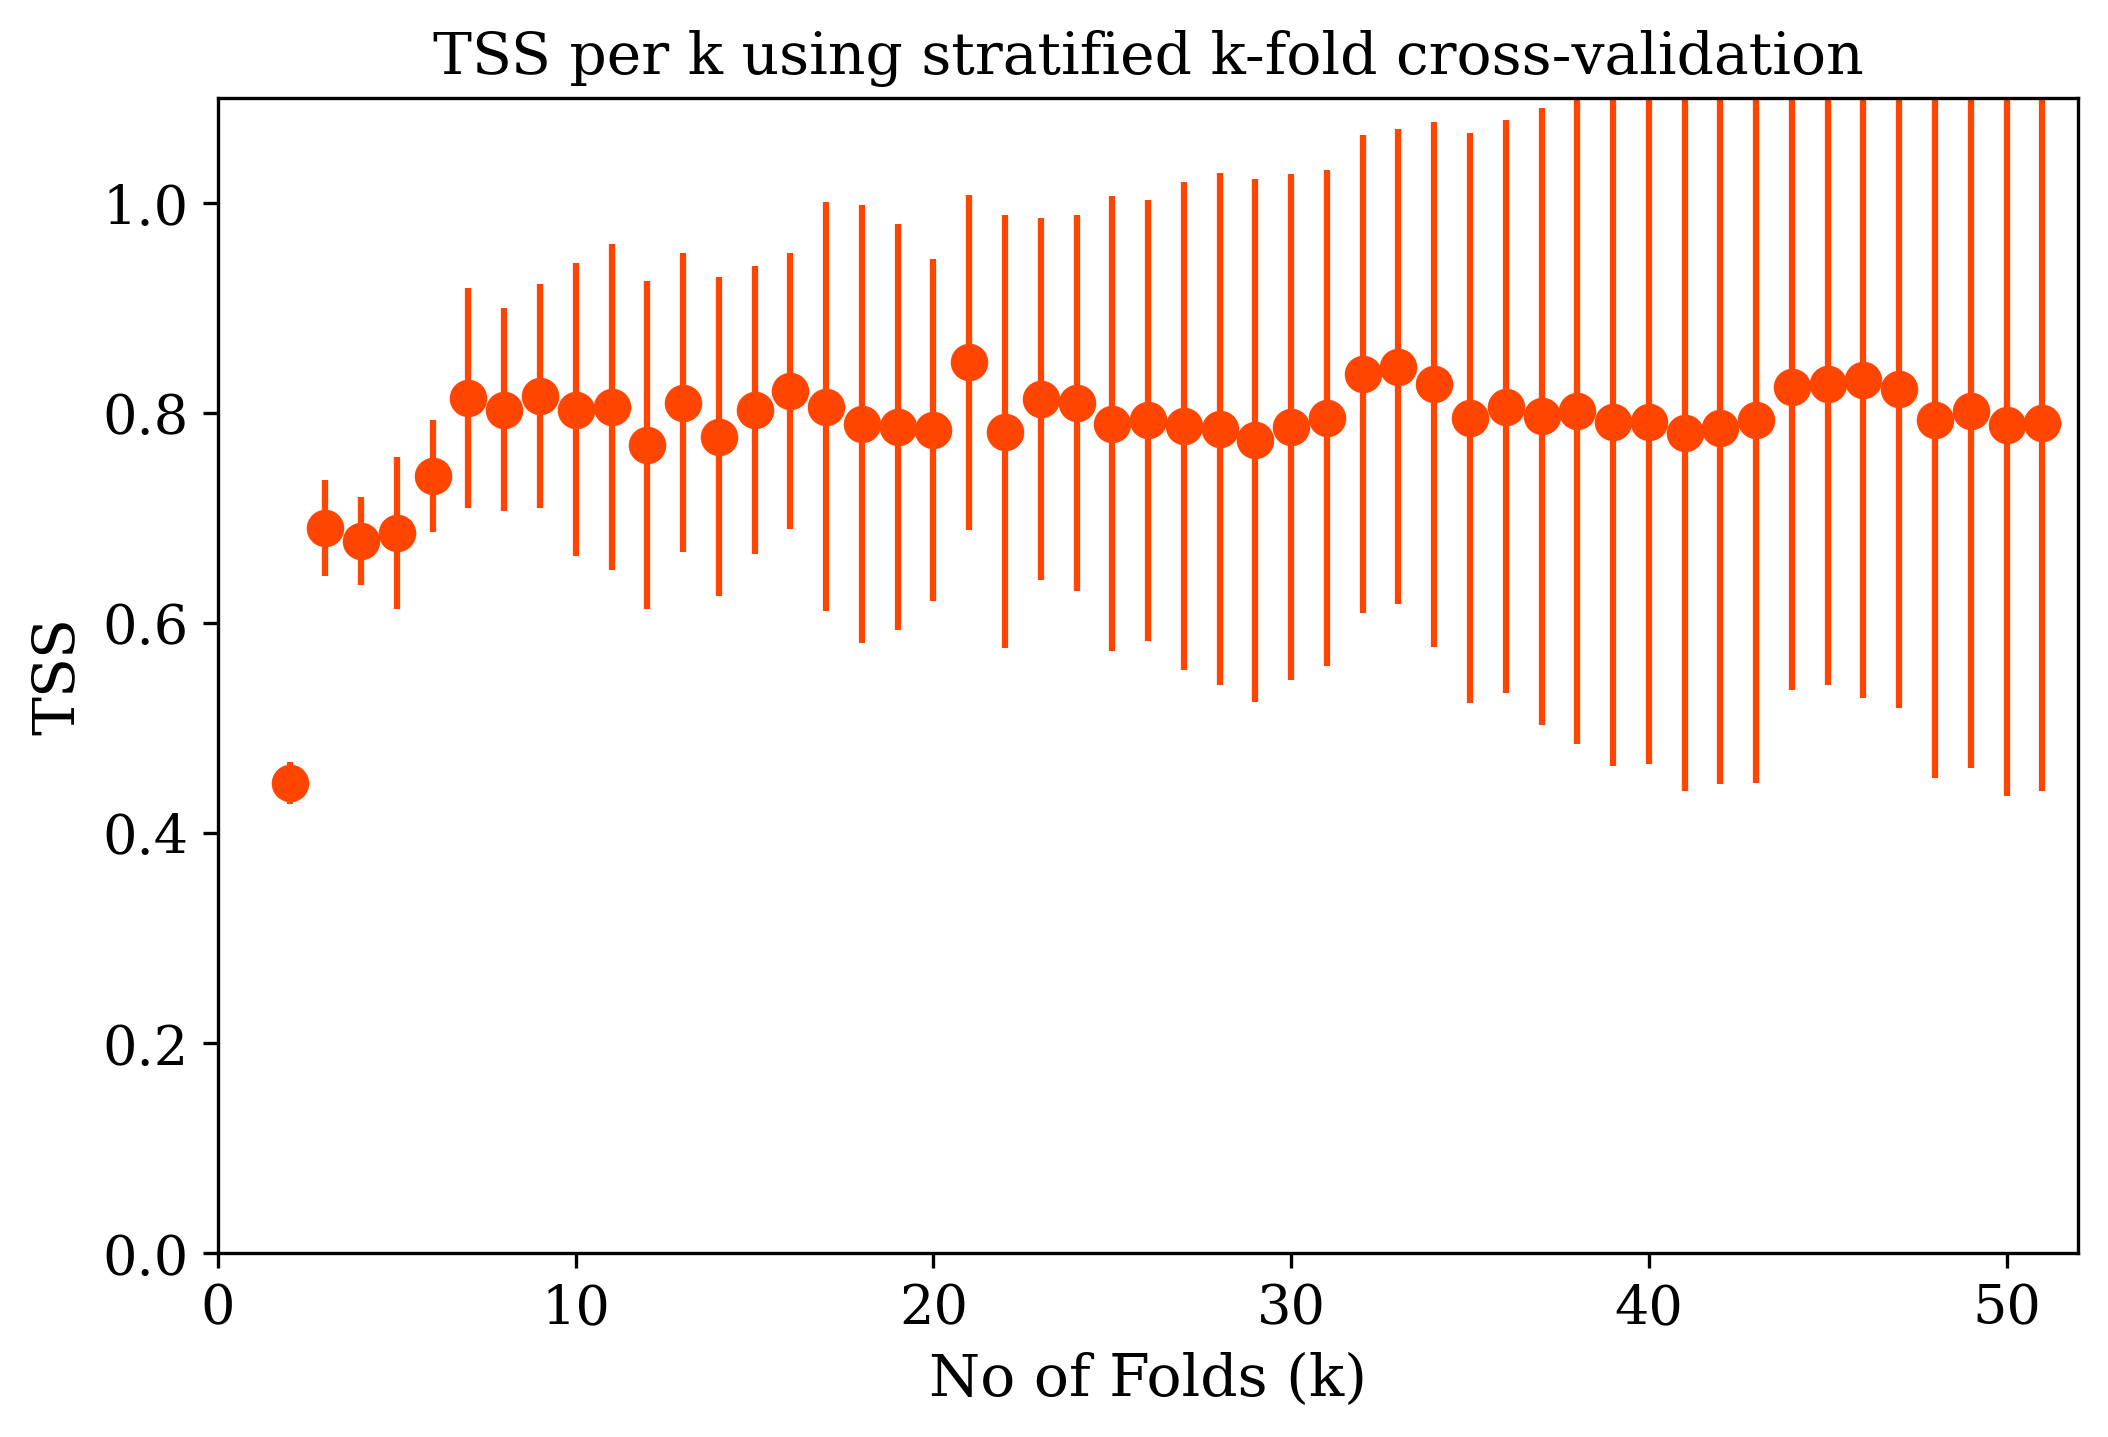

In [14]:
fig, ax = plt.subplots(figsize=(8, 5),dpi = 300)      # define the size of the figure
orangered = (1.0, 0.27, 0, 1.0)              # create an orange-red color
cornblue = (0.39, 0.58, 0.93, 1.0)           # create a cornflower-blue color

# define some style elements
marker_style_red = dict(linestyle='', markersize=8,
                        fillstyle='full', color=orangered, markeredgecolor=orangered)
marker_style_blue = dict(linestyle='', markersize=8,
                         fillstyle='full', color=cornblue, markeredgecolor=cornblue)

# ascribe the data to the axes
k = np.arange(50)+2
for i in range(50):
    if (array_of_avg_TSS[i] > array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=orangered)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_red)
    if (array_of_avg_TSS[i] <= array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=cornblue)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_blue)

# set plot limits
plt.xlim(xmax=52, xmin=0)
plt.ylim(ymax=1.1, ymin=0)

# label the axes and the plot
ax.set_xlabel('No of Folds (k)')
ax.set_ylabel('TSS')
plt.title(r'TSS per k using stratified k-fold cross-validation')
fig = plt.gcf()

In [15]:
print("The TSS equals", array_of_avg_TSS[9],"plus or minus", array_of_std_TSS[9], ".")

The TSS equals 0.8057851239669421 plus or minus 0.15503597704695513 .


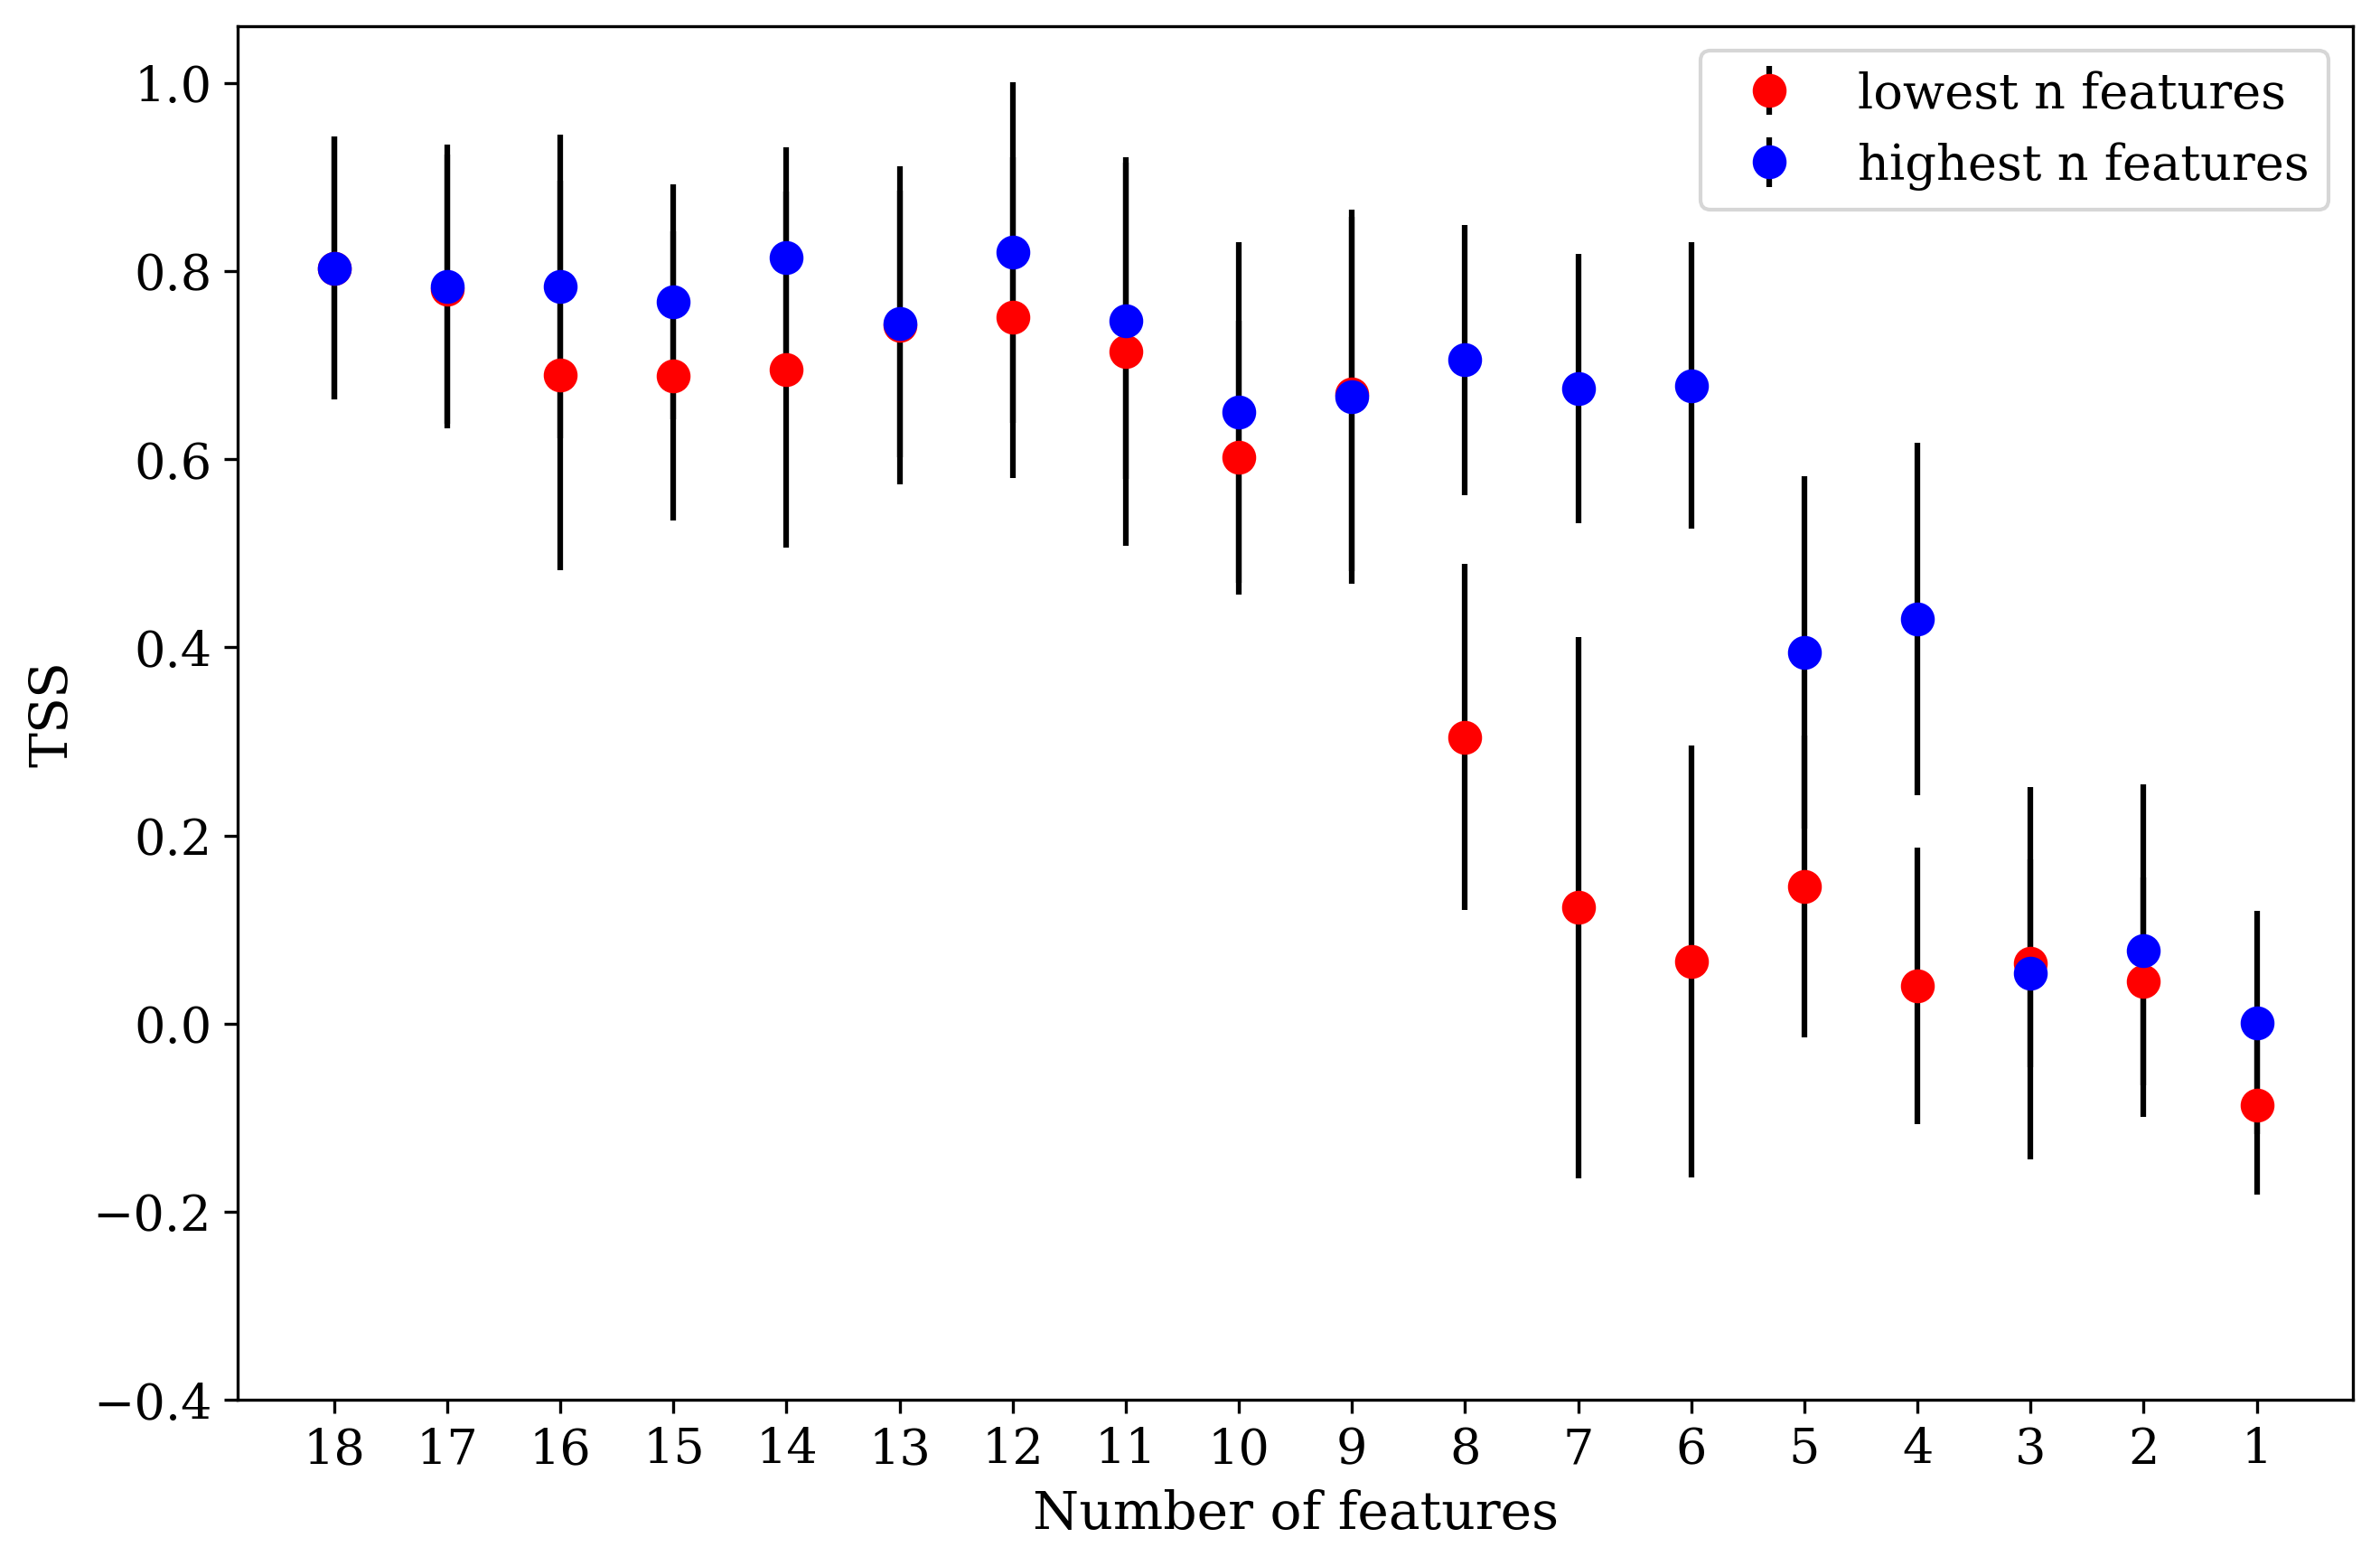

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

num_features = list(range(1, len(ordered_features)+1))

tss_means_high2low = []
tss_stds_high2low = []
tss_means_low2high = []
tss_stds_low2high = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# High to Low ranking (blue dots)
for k in num_features:
    selected_features = ordered_features[:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    mean_tss, std_tss = np.mean(TSS_k), np.std(TSS_k)
    tss_means_high2low.append(mean_tss)
    tss_stds_high2low.append(std_tss)

# Low to High ranking (red dots)
for k in num_features:
    selected_features = ordered_features[::-1][:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    tss_means_low2high.append(np.mean(TSS_k))
    tss_stds_low2high.append(np.std(TSS_k))

# Plot
plt.figure(figsize=(9, 6), dpi = 300)
plt.errorbar(num_features, tss_means_low2high, yerr=tss_stds_low2high, color='black', label='lowest n features', fmt='o', markerfacecolor='red', markeredgecolor='red', markersize=8)

plt.errorbar(num_features, tss_means_high2low, yerr=tss_stds_high2low, color='black', label='highest n features', fmt='o', markerfacecolor='blue', markeredgecolor='blue', markersize=8)

plt.xlabel('Number of features')
plt.ylabel('TSS')
plt.xticks(num_features)
plt.yticks(np.arange(-0.4, 1.2, 0.2))

plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [17]:
no_features = [i for i in range(1,19)]
table = pd.DataFrame({'Number of features': no_features,
                          'TSS highest to lowest': tss_means_high2low,
                          'Std highest to lowest': tss_stds_high2low,
                          'TSS lowest to highest': tss_means_low2high,
                          'Std lowest to highest': tss_stds_low2high})
table

,Number of features,TSS highest to lowest,Std highest to lowest,TSS lowest to highest,Std lowest to highest
0,1,0.001156,0.118591,-0.086456,0.095542
1,2,0.077553,0.176658,0.044550,0.110482
2,3,0.053664,0.197623,0.064474,0.110574
3,4,0.430075,0.187239,0.040330,0.146722
4,5,0.394580,0.187709,0.145571,0.160613
5,6,0.678168,0.152146,0.065946,0.229537
6,7,0.674865,0.142927,0.123273,0.288032
7,8,0.705345,0.143845,0.304730,0.184095
8,9,0.666456,0.198747,0.669489,0.188309
9,10,0.649640,0.181094,0.601787,0.145519


# Correct Normalisation

  Here I am first combining the positive and the negative data and then normalizing it.

In [18]:
positive = pd.read_csv("Data 2016/positive24.csv")
negative = pd.read_csv("Data 2016/negative24.csv")

In [19]:
data = pd.concat([positive,negative],axis =0,ignore_index=True)
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,1.226148e+13,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,3.884153e+12,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,3.430647e+13,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.969386e+13,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,4.460671e+13,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,359,5.699735e+22,82.488,0.001285,3897.788,12.100,2835.275,37.319,0.003836,31.916,...,1.703524e+12,4.489937e+23,26.183,1631.551880,4.462,111.481,5637,12360,M1.3,2015.06.12_07:29_TAI
418,360,5.030321e+22,84.406,-0.010059,18649.460,51.975,3790.262,56.851,-0.014943,53.730,...,2.357469e+13,1.586148e+24,47.933,1852.075806,4.995,644.160,5692,12371,M1.0,2015.06.19_06:48_TAI
419,361,5.012767e+22,79.442,-0.011058,17702.280,57.464,3866.555,55.125,-0.019343,56.835,...,3.160948e+13,1.704056e+24,50.868,1849.319458,4.941,801.508,5692,12371,M2.7,2015.06.20_02:34_TAI
420,362,4.341204e+22,109.424,0.005738,5334.497,18.022,2990.720,52.363,0.014466,36.470,...,2.133461e+13,4.428561e+23,31.039,1728.649536,4.532,358.677,5673,12367,M3.8,2015.06.20_09:44_TAI


In [20]:
data = data.drop(["Unnamed: 0","HARPNUM","NOAA","Class","Peak Time"],axis =1)
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,117.582,0.104880,5.032922e+13,1.226148e+13,7.077275e+23,50.329,945.314636,4.805,745.287
1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,99.163,0.130367,3.344854e+13,3.884153e+12,4.733711e+23,43.479,961.502686,4.303,63.441
2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,100.010,-0.131131,7.631205e+13,3.430647e+13,1.074422e+24,35.873,1934.446167,4.865,615.008
3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,110.939,0.004581,3.136324e+13,1.969386e+13,1.879337e+23,28.525,970.551636,3.971,367.530
4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,115.866,0.322013,4.301247e+13,4.460671e+13,5.269515e+23,43.929,1259.099854,4.777,1080.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,5.699735e+22,82.488,0.001285,3897.788,12.100,2835.275,37.319,0.003836,31.916,87.984,-0.031624,5.653856e+13,1.703524e+12,4.489937e+23,26.183,1631.551880,4.462,111.481
418,5.030321e+22,84.406,-0.010059,18649.460,51.975,3790.262,56.851,-0.014943,53.730,95.842,-0.135981,6.695204e+13,2.357469e+13,1.586148e+24,47.933,1852.075806,4.995,644.160
419,5.012767e+22,79.442,-0.011058,17702.280,57.464,3866.555,55.125,-0.019343,56.835,88.759,-0.013210,7.406341e+13,3.160948e+13,1.704056e+24,50.868,1849.319458,4.941,801.508
420,4.341204e+22,109.424,0.005738,5334.497,18.022,2990.720,52.363,0.014466,36.470,114.836,-0.025103,5.857439e+13,2.133461e+13,4.428561e+23,31.039,1728.649536,4.532,358.677


In [21]:
data.shape

(422, 18)

In [22]:
data_n1 = normalize_the_data(data)
xdata = data_n1
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

In [23]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18

selector = SelectKBest(f_classif, k=N_features)
selector.fit(xdata,ydata)
scores = selector.scores_
print(scores)

[0.09261774 5.72579729 0.7381978  0.01219224 0.47418033 0.78099688
 3.13400978 1.80413204 0.02556041 8.41292418 0.14965466 0.3542363
 9.62621717 0.46061421 0.23030296 0.09553315 0.02773737 9.4816348 ]


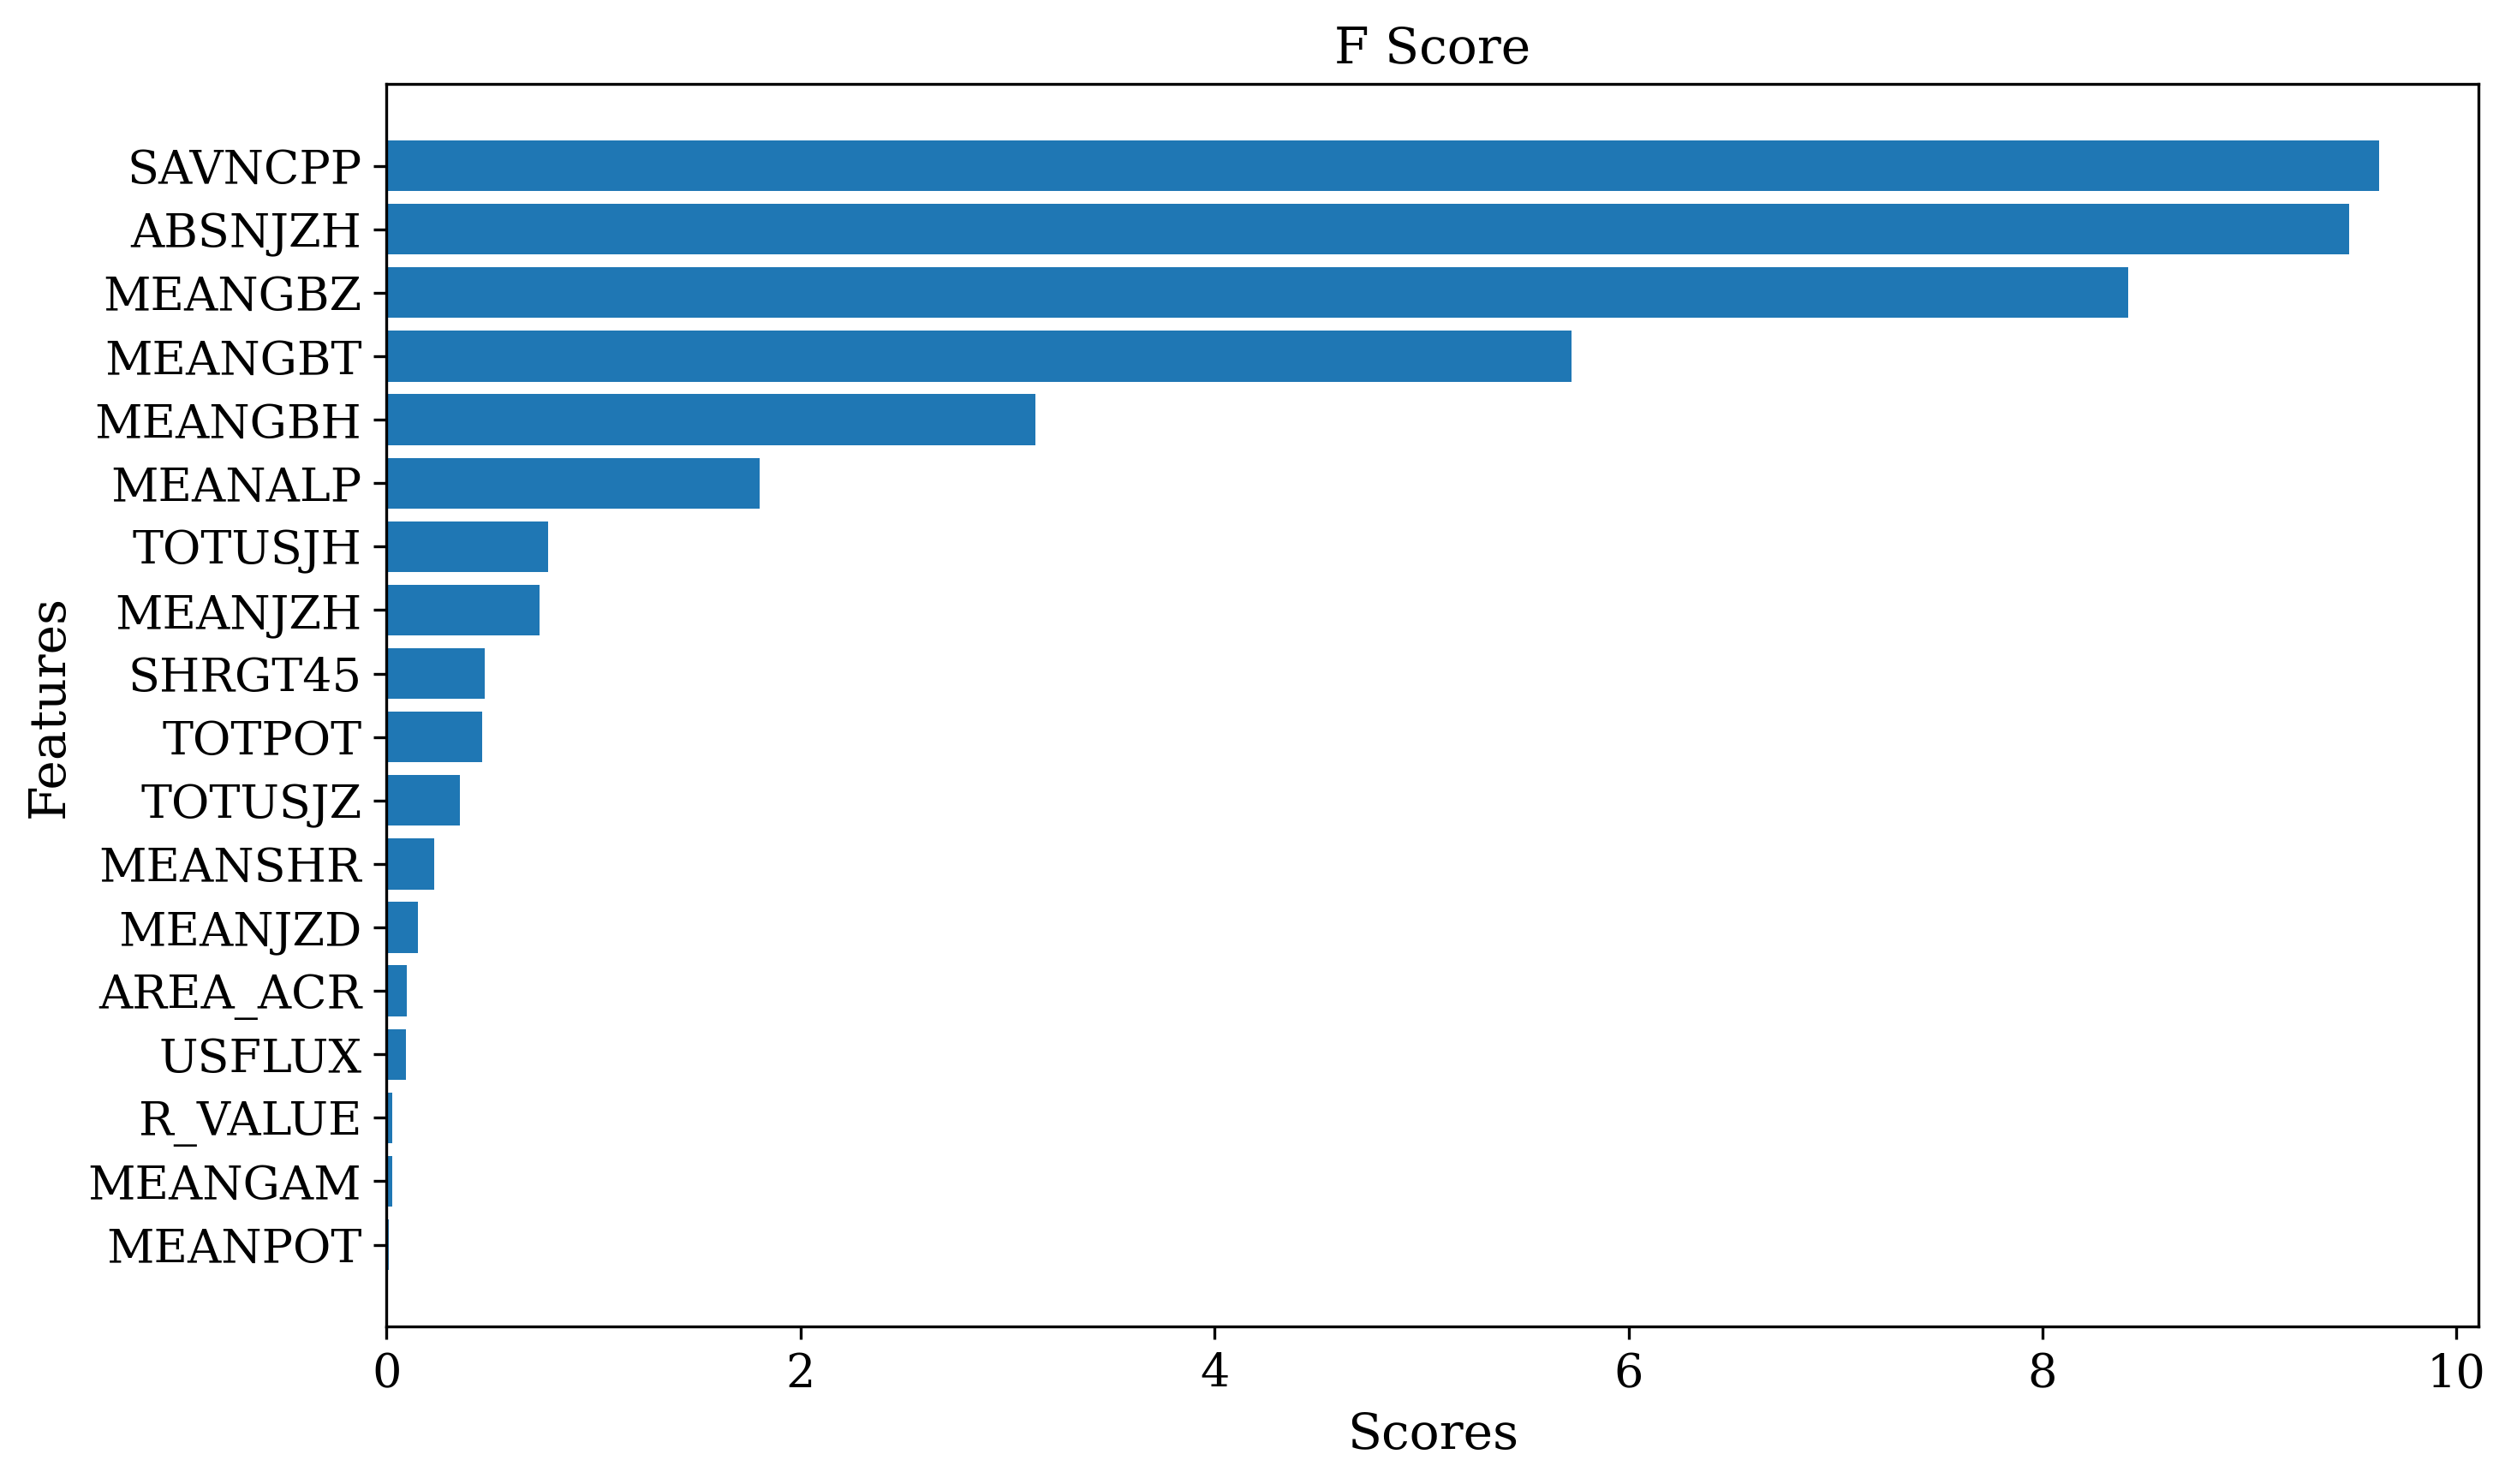

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH','MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH']
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [25]:
from sklearn import svm
number_of_examples = data.shape[0]
C = 4.0
gamma = 0.075
class_weight = "balanced"
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', class_weight=class_weight,cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True)

In [26]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [27]:
from sklearn.model_selection import StratifiedKFold

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# xdata are the examples
# ydata are the labels
xdata = data_n1
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(2, 52):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

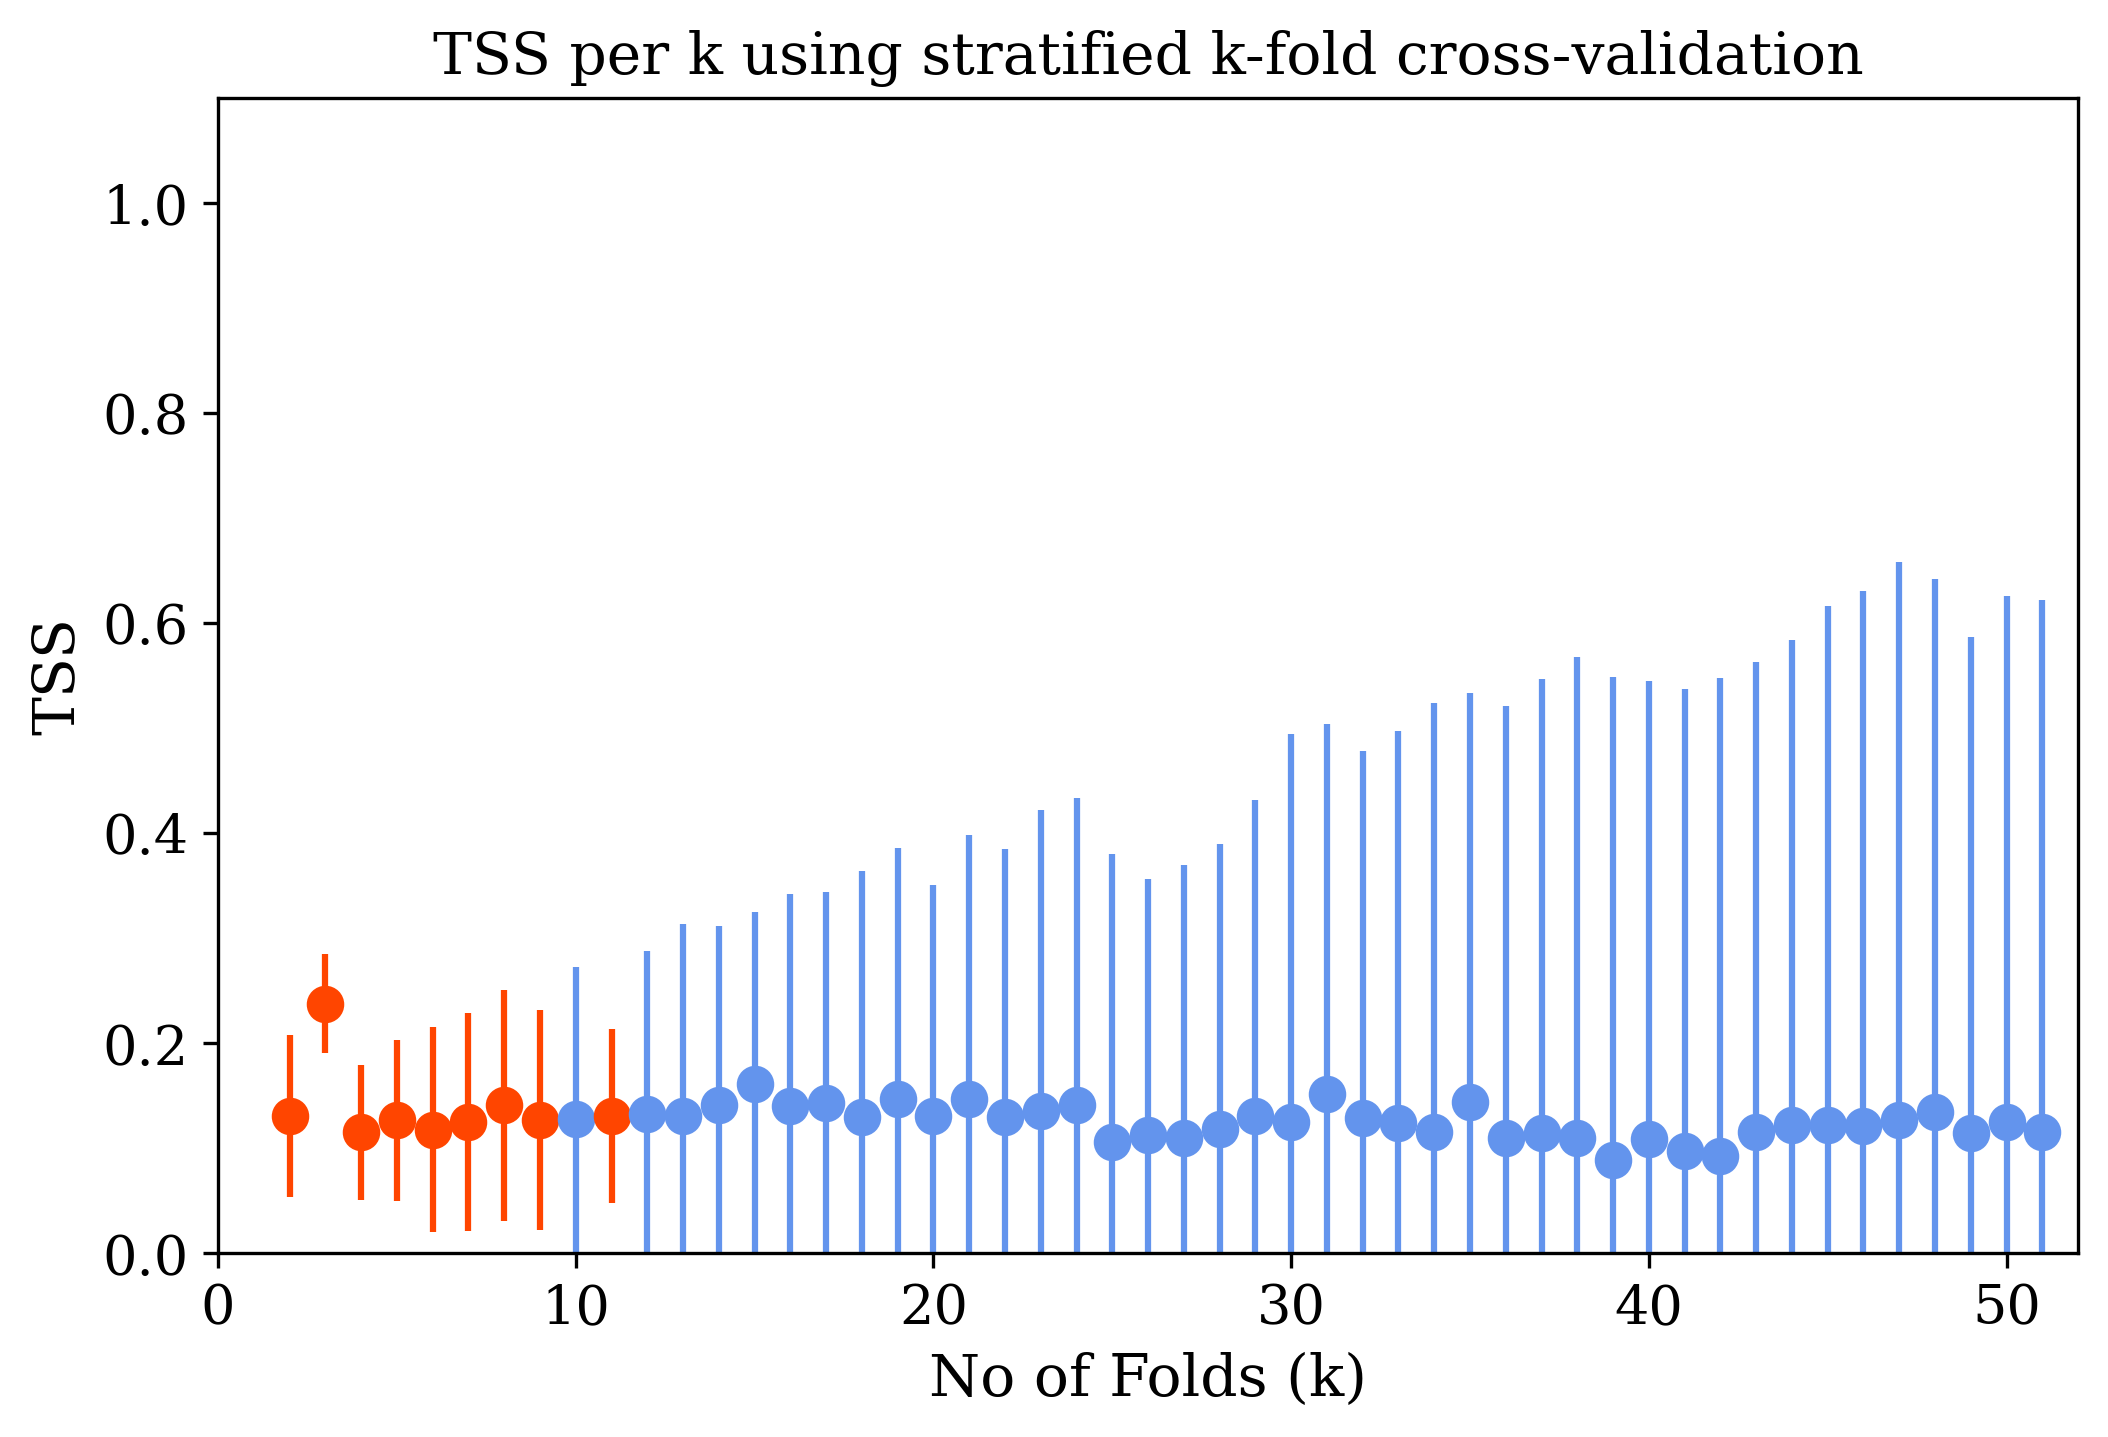

In [28]:
fig, ax = plt.subplots(figsize=(8, 5),dpi = 300)      # define the size of the figure
orangered = (1.0, 0.27, 0, 1.0)              # create an orange-red color
cornblue = (0.39, 0.58, 0.93, 1.0)           # create a cornflower-blue color

# define some style elements
marker_style_red = dict(linestyle='', markersize=8,
                        fillstyle='full', color=orangered, markeredgecolor=orangered)
marker_style_blue = dict(linestyle='', markersize=8,
                         fillstyle='full', color=cornblue, markeredgecolor=cornblue)

# ascribe the data to the axes
k = np.arange(50)+2
for i in range(50):
    if (array_of_avg_TSS[i] > array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=orangered)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_red)
    if (array_of_avg_TSS[i] <= array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=cornblue)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_blue)

# set plot limits
plt.xlim(xmax=52, xmin=0)
plt.ylim(ymax=1.1, ymin=0)

# label the axes and the plot
ax.set_xlabel('No of Folds (k)')
ax.set_ylabel('TSS')
plt.title(r'TSS per k using stratified k-fold cross-validation')
fig = plt.gcf()

In [29]:
print("The TSS equals", array_of_avg_TSS[9],"plus or minus", array_of_std_TSS[9], ".")

The TSS equals 0.13072435585804573 plus or minus 0.08249036667340552 .


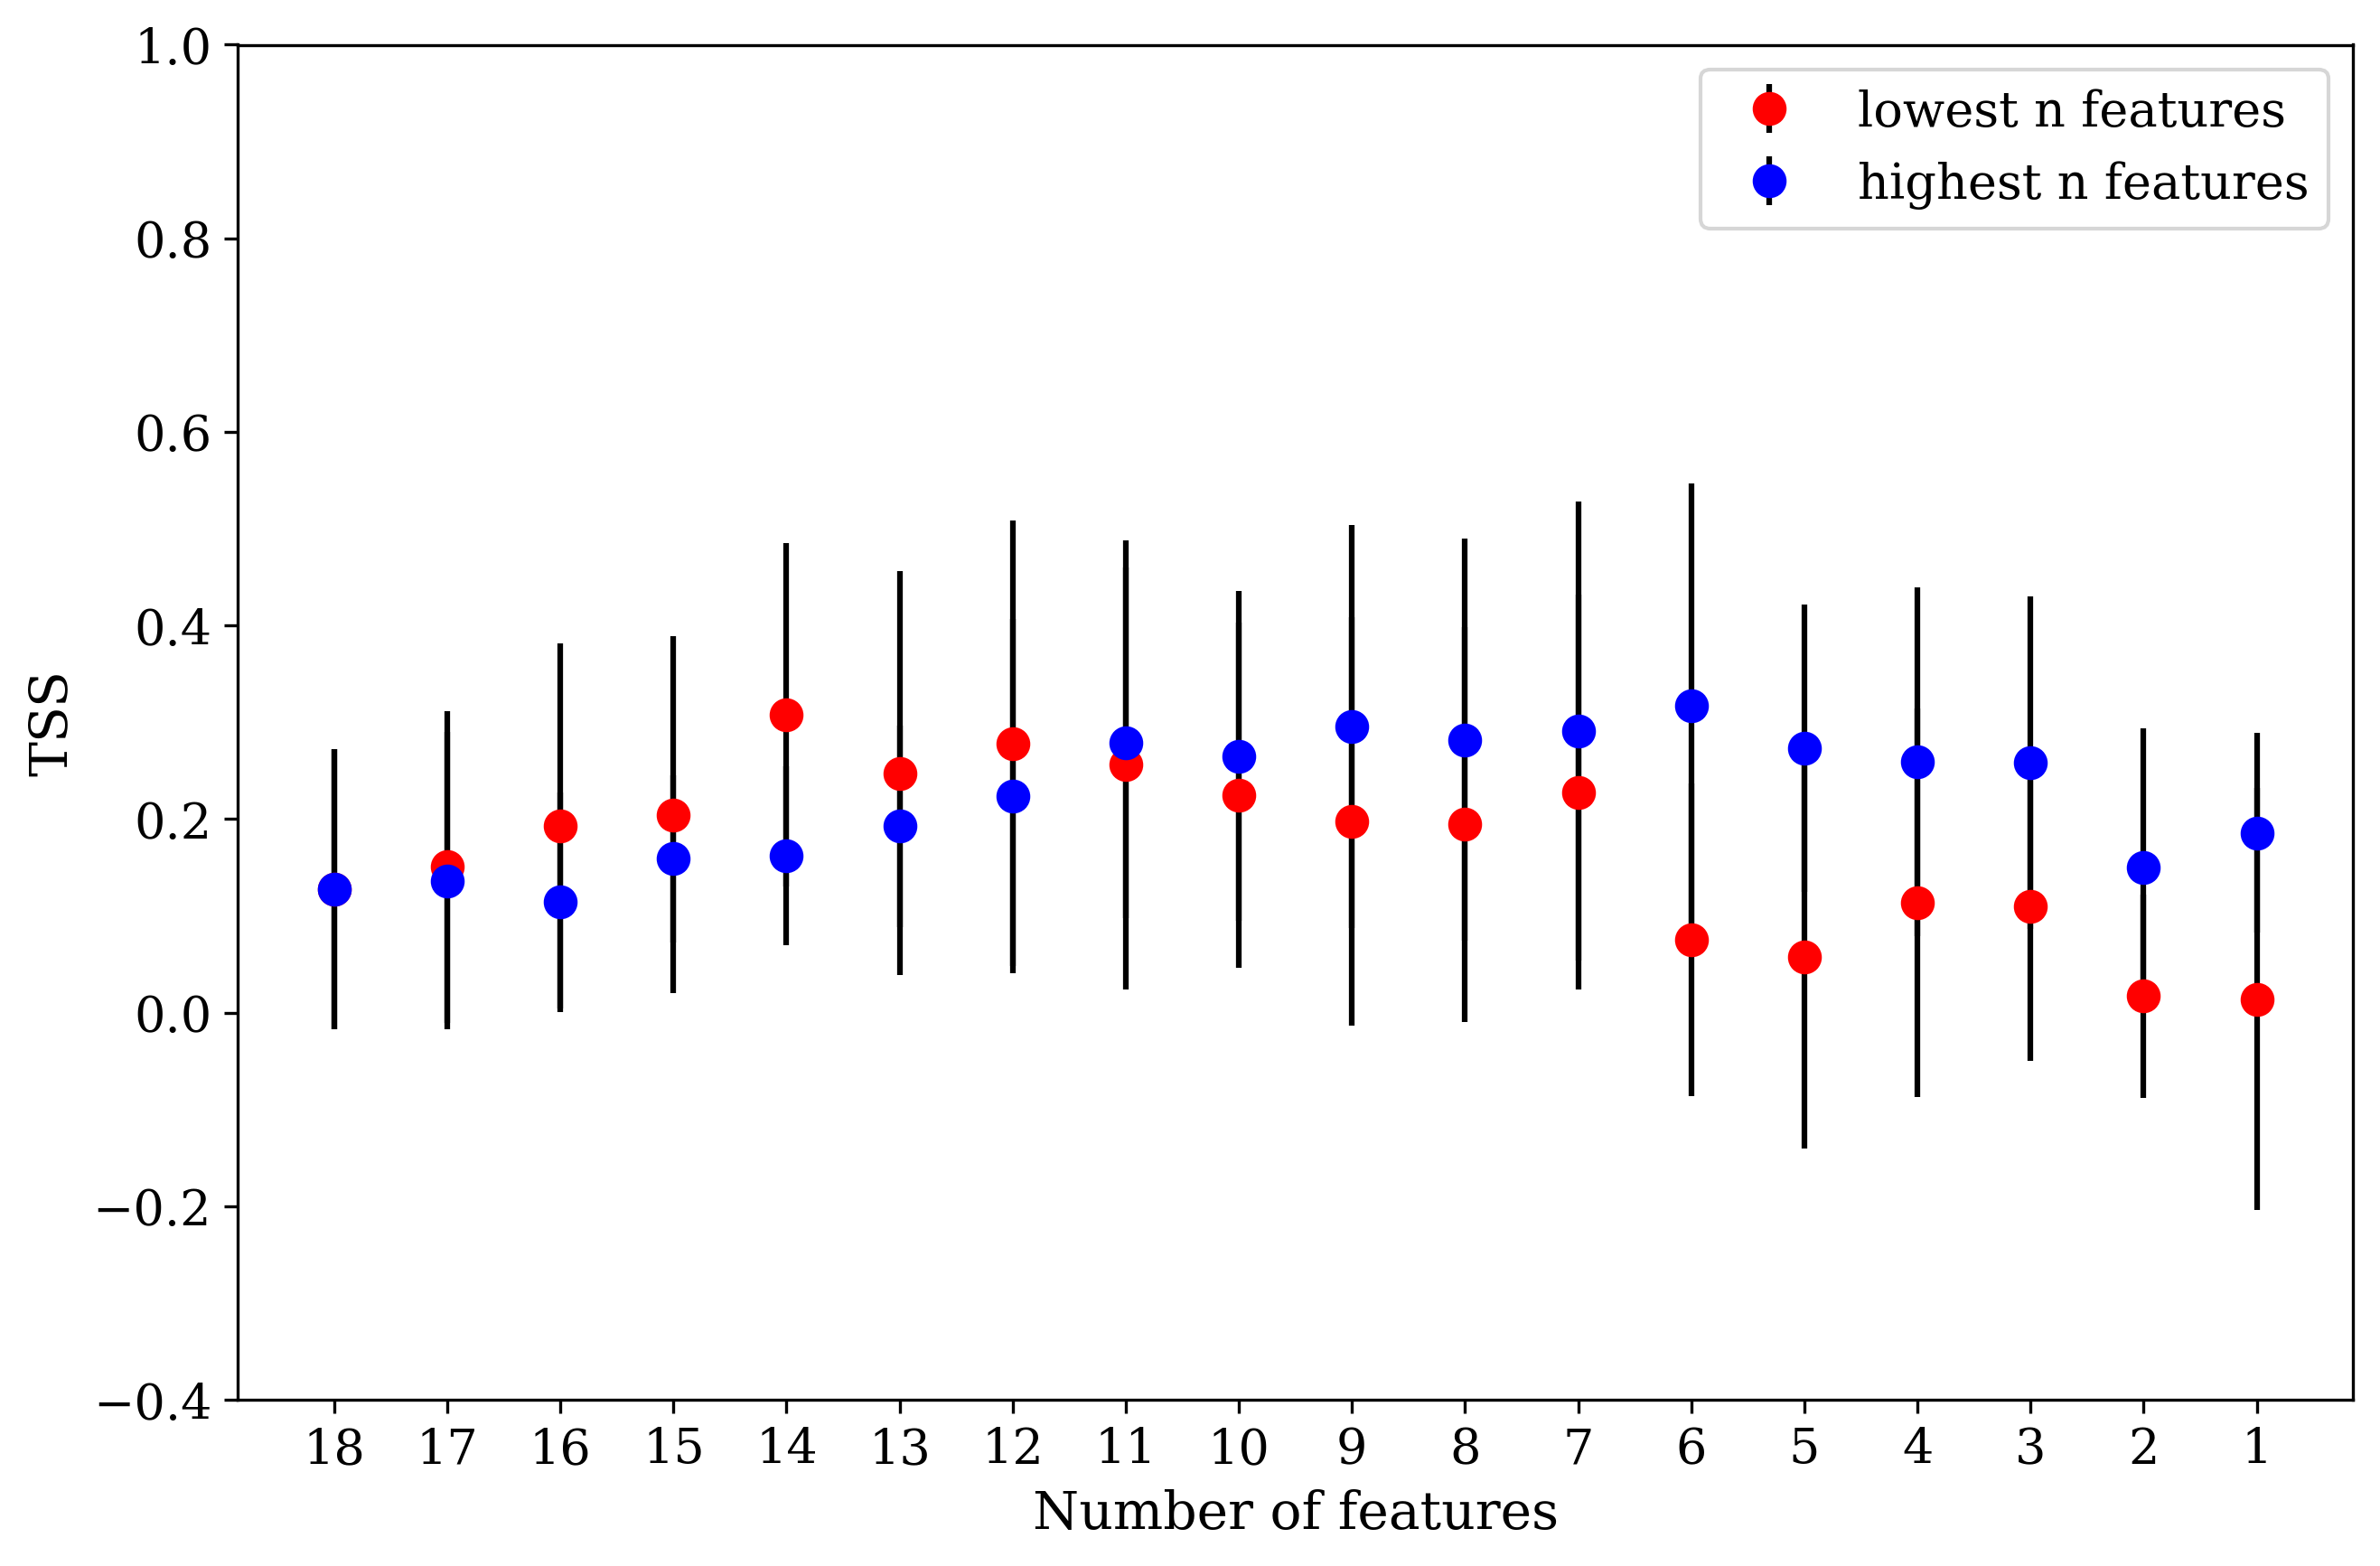

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

num_features = list(range(1, len(ordered_features)+1))

tss_means_high2low = []
tss_stds_high2low = []
tss_means_low2high = []
tss_stds_low2high = []

# High to Low ranking (blue dots)
for k in num_features:
    selected_features = ordered_features[:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    mean_tss, std_tss = np.mean(TSS_k), np.std(TSS_k)
    tss_means_high2low.append(mean_tss)
    tss_stds_high2low.append(std_tss)

# Low to High ranking (red dots)
for k in num_features:
    selected_features = ordered_features[::-1][:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    tss_means_low2high.append(np.mean(TSS_k))
    tss_stds_low2high.append(np.std(TSS_k))

# Plot
plt.figure(figsize=(9, 6), dpi = 300)
plt.errorbar(num_features, tss_means_low2high, yerr=tss_stds_low2high, color='black', label='lowest n features', fmt='o', markerfacecolor='red', markeredgecolor='red', markersize=8)

plt.errorbar(num_features, tss_means_high2low, yerr=tss_stds_high2low, color='black', label='highest n features', fmt='o', markerfacecolor='blue', markeredgecolor='blue', markersize=8)

plt.xlabel('Number of features')
plt.ylabel('TSS')
plt.xticks(num_features)
plt.yticks(np.arange(-0.4, 1.2, 0.2))

plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [31]:
no_features = [i for i in range(1,19)]
table = pd.DataFrame({'Number of features': no_features,
                          'TSS highest to lowest': tss_means_high2low,
                          'Std highest to lowest': tss_stds_high2low,
                          'TSS lowest to highest': tss_means_low2high,
                          'Std lowest to highest': tss_stds_low2high})
table

,Number of features,TSS highest to lowest,Std highest to lowest,TSS lowest to highest,Std lowest to highest
0,1,0.185856,0.103377,0.014114,0.217692
1,2,0.150420,0.142906,0.017252,0.105211
2,3,0.258333,0.172105,0.110210,0.160405
3,4,0.258889,0.180212,0.113604,0.201046
4,5,0.272853,0.148372,0.057492,0.197945
5,6,0.317192,0.229856,0.075375,0.161495
6,7,0.290571,0.237068,0.227883,0.203891
7,8,0.281937,0.207910,0.194775,0.203950
8,9,0.295375,0.208237,0.197553,0.211370
9,10,0.265045,0.170268,0.224880,0.178105
